In [1]:
import numpy as np
import pandas as pd
import random


## Generation de données

In [ ]:
def generate_time_series_example(num_positions, num_time_steps, doa_indices, max_speed):
    # Générer une vitesse aléatoire pour chaque exemple
    initial_doa_indices = doa_indices
    speeds = []
    for i in range(len(doa_indices)):
        speed = (1,-1)[np.random.randint(0,2)==1]
        if speed == 1:
            speed*= random.randint(1, int((abs(180-doa_indices[i]))/num_time_steps))
        else:
            speed *= random.randint(1,int(doa_indices[i]/num_time_steps))
        speeds+=speed,
    # Normaliser la vitesse
    #normalized_speed = speed / np.mean(speed)

    # Initialiser une série temporelle de positions pour chaque exemple
    time_series_positions = []

    for _ in range(num_time_steps):
        # Générer un vecteur de positions initialisé à zéro
        positions = np.zeros(num_positions)

        # Placer des '1' aux indices spécifiés pour les DoA
        positions[list(doa_indices)] = 1

        # Ajouter la série temporelle de positions à la liste
        time_series_positions.append(positions)

        # Mettre à jour les indices des DoA en fonction de la vitesse
        doa_indices = np.array(doa_indices) + np.array(speeds)
    # Créer un dataframe pandas avec la série temporelle de positions et la vitesse associée

    time_series_positions= np.array(time_series_positions)
    # Créer la DataFrame
    df = pd.DataFrame({i: time_series_positions[i].reshape(1,181).tolist() for i in range(time_series_positions.shape[0])})

    speeds_res = np.zeros(num_positions)
    speeds_res[initial_doa_indices] = speeds
    df['Speed'] = speeds_res.reshape(1,181).tolist()
    return df

In [8]:


# Paramètres
num_positions = 181
num_time_steps = 5

max_speed = 10.0  # Vitesse maximale

all_examples = pd.DataFrame()

for example_idx in range(100000):
    doa_indices = [random.randint(30,150), random.randint(30,150)]
    # Générer une série temporelle de 5 mesures associée à une vitesse
    time_series_example = generate_time_series_example(num_positions, num_time_steps, doa_indices, max_speed)



    # Ajouter la ligne à l'ensemble des exemples
    all_examples = pd.concat([all_examples, time_series_example], axis=0, ignore_index=True)

# Enregistrer toutes les séries temporelles dans un seul fichier CSV
all_examples.to_csv('temporal_measures_trainset.csv', index=False)

NameError: name 'generate_time_series_example' is not defined

In [6]:
def get_dataset(path):
  data = pd.read_csv(path,header=None, index_col=False)
  X = data.iloc[1:,:5].values
  y = data.iloc[1:,5].values
  sy = list(map(lambda yy: yy.strip('][').split(', '),y))
  y = np.array(sy).astype(np.float32)
  X = np.array([ list(map(lambda mesure: mesure.strip('][').split(', '),X[i]))for i in range(len(X))]).astype(np.float32)
  return X,y

## Test et prédictions

In [2]:
from Models.RNNmodel import RNNModel
model = RNNModel()
model.load("RNNModel1")

OSError: No file or directory found at C:\Users\Younes srh\Desktop\I3\ProjetRadarIA/Models/saved/RNNModel1

In [11]:
# Faire des prédictions sur de nouvelles données (remplacez avec vos données de test)
Xtest,ytest = get_dataset("./Data/temporal_measures_testset.csv")
predictions = model.predict(Xtest)

print("Predictions:", predictions)

313/313 [==============================] - 1s 3ms/step
Predictions: [[ 0.00223894 -0.01193082 -0.02598203 ...  0.00595028  0.00585863
   0.01376195]
 [-0.00235584  0.0005217   0.00086629 ... -0.00045733  0.0002167
   0.0017541 ]
 [ 0.0140188   0.01722031  0.01866024 ... -0.00602975 -0.01192925
  -0.0197075 ]
 ...
 [-0.00179158  0.01360585 -0.01230781 ...  0.01492967 -0.03145906
   0.0216356 ]
 [-0.00415665  0.00865273  0.00468268 ... -0.00295552 -0.00645641
  -0.0093558 ]
 [-0.00234419 -0.00413437 -0.0039358  ...  0.00636543  0.00696305
   0.00098497]]


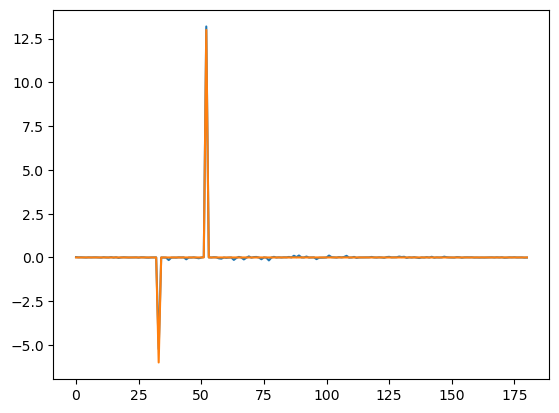

In [49]:
import matplotlib.pyplot as plt
import random
k = random.randint(0,len(predictions))
plt.plot(np.arange(0,181,1),predictions[k],ytest[k])